In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Intro

최근 연구에 따르면 convolutional networks는 input layer 또는 output layer에 가까운 layers일수록 더 정확하고, train시키기 효율적이라는 것이 증명이 되었습니다.<br>
Dense convolutional Network (이하 DenseNet)은 이러한 이론을 받아들여 만들어졌으며, DenseNet의 모든 layer는 다른 레이어와 feed-forward 형식으로 모두 연결이 되어 있습니다.

일반적인 neural network의 경우 L layers가 있다면 L connections이 존재하나, <br>
DenseNet에서는 $ \frac{L(L+1)}{2} $ L 개의 direct connections이 존재하며 장점은 다음과 같습니다.

1. Vanishing-gradient problem을 다소 해소 
2. feature propagation을 강화 
3. 더 적은 parameters의 사용으로 메모리를 줄이고, 더 적은 computation을 요구함 

## Feed-Forward Networks

일반적은 convolutional feed-forward networks는 $ \mathscr{l}^{th} $ 레이어의 output을 $ (\mathscr{l} +1)^{th} $의 input으로 연결시키며 다음과 같은 형식을 갖고 있습니다.

$$ \mathbf{y}_{\mathscr{l}} = H_{\mathscr{l}} \left( \mathbf{y}_{\mathscr{l} - 1} \right) $$

* Network는 $ L $ 개의 layers를 갖고 있음
* 각각의 layers는 $ H_{\mathscr{l}}() $ non-linear transformation을 구현하며, $ \mathscr{l}$ 은 특정 layer의 index
* $ H_{\mathscr{l}}() $ 은 conposite function으로서 Batch Normalization (BN), rectified linear units (ReLU), Pooling, 또는 Convolution (Conv) 등등을 포함
* $ \mathscr{l} $ layer의 output을 $ \mathbf{y}_{\mathscr{l}} $ 로 표현

## Residual Networks

ResNet의 경우에는 skip-connection을 추가하였으며, identity function으로 non-linear transformations을 통과시킵니다.<br>
ResNet의 장점으로는 **gradient값이 나중 레이어에서 -> 이전 레이어로 직접적으로 적용 (gradient flow)**되지만, <br>
identity function과 $ H_{\mathscr{l}} $ 의 합은 **information flow를 막습니다**.


$$ \mathbf{y}_{\mathscr{l}} = H_{\mathscr{l}} \left( \mathbf{y}_{\mathscr{l} - 1} \right) + \mathbf{y}_{\mathscr{l} - 1} $$

> ConvNet에서 ResNet은 input값을 conv, batch normalization, pooling 등을 거치고 난 값과 더합니다. <br>
> 이때 pooling이 적용되었다면, 동일하게 input값에도 적용해서 shape을 맞춰줍니다.<br>
> 이렇게 더해준뒤 activation을 적용하거나 아예 뺄기도 합니다.


자세한 내용은 [Training Residual Nets](http://torch.ch/blog/2016/02/04/resnets.html)을 참고 합니다.

### Residual block architecture

![alt text](./images/resnets_modelvariants.png)

### Classification Error Result

결론적으로 ReLU를 제거하고, Batch Normalization은 Addition을 하기 전에 해주는 것이 좋습니다.

![alt text](./images/resnets_archtesterror.png)



# Dense Convolution Networks (DenseNet)

## Dense Connectivity

궁극적으로 DenseNet은 모든 레이어를 연결함으로서 information flow를 강화하였습니다.<br>
아래의 공식처럼 $ \mathscr{l}^{th} $ 레이어는 그 이전의 모든 레이어의 feature-maps을 input으로 받습니다.

$$ \mathbf{y}_{\mathscr{l}} = H_{\mathscr{l}} \left( \left[ \mathbf{y}_0, \mathbf{y}_1 , ..., \mathbf{y}_{\mathscr{l}-1}\right] \right) $$

여기서 $ \left[ \mathbf{y}_0, \mathbf{y}_1 , ..., \mathbf{y}_{\mathscr{l}-1}\right] $의 의미는 feature-maps들의 concatenation을 의미합니다.

## Composite Function

Composite function $ H_{\mathscr{l}}() $ 는 다음의 순서를 갖은 operations을 의미합니다.

1. Batch Normalization (BN)
2. Rectified Linear Unit (ReLU)
3. 3 x 3 Convolution (Conv)

## Pooling Layer

Dense Connectivity에 있는 공식에서 **concatenation operation**이 사용이 됩니다.<br>
하지만 concatenation operation은 feature-maps의 크기가 달라지면 적용을 할 수가 없게 됩니다.

DenseNet에서는 feature-maps의 크기가 달라지는 pooling layer부분을 해결하기 위해서 network를 multiple densely connected <span style="color:red"> **dense blocks** </span> 으로 나누었습니다.

![alt text](./images/denseblock.png)

block 사이에 있는 layers들을 <span style="color:red">**transition layers**</span> 라고 하며, convolution 그리고 pooling을 가르킵니다.<br>
논문에서는 transition layers를 다음과 같이 구성하였습니다.

1. Batch Normalization Layer
2. 1 x 1 Convolution Layer
3. 2 x 2 Average Pooling Layer

## Growth Rate

특정 Layer의 Input feature-maps의 사이즈는 다음과 같습니다. <br>

$$ k * (\mathscr{l} - 1) + k_0  $$

* $ k_0 $: Input 이미지의 채널값 입니다.


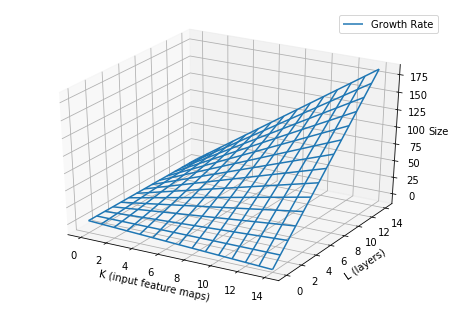

In [43]:
from mpl_toolkits.mplot3d import Axes3D

def growth_rate(k, l, c=3):
    return k * (l - 1) + c

K = np.arange(0, 15)
L = np.arange(0, 15)
K, L = np.meshgrid(K, L)
Z = growth_rate(K, L)

fig = plt.figure(1)
ax = Axes3D(fig)
ax.set_xlabel('K (input feature maps)')
ax.set_ylabel('L (layers)')
ax.set_zlabel('Size')
ax.plot_wireframe(K, L, Z, rstride=1, cstride=1, label='Growth Rate')
ax.grid()
ax.legend()

Network가 지나치게 커지는 것을 막기 위해서 k의 값은 대략 작은 값으로 제한합니다. (예.. $ k = 12 $)<br>
여기서 k의 값은 hyper-parameter로 두며 논문에서는 작은값.. (12, 24, 40) 등으로도 충분한 결과를 내놓고 있다고 합니다.

## Bottleneck Layers

3 x 3 convolution앞에 **bottleneck layer로서 1 x 1 convolution**을 놓아서 feature-maps의 갯수를 줄일수 있습니다.<br>
특히 1 x 1 convolution은 DenseNet에서 매우 효과적으로 움직이며 논문에서는 다음과 같은 $ H_{\mathscr{l}} $에서 효과적이었다고 말합니다.

**BN -> ReLU -> Conv(1x1) -> BN -> ReLU -> Conv(3x3)**

## DenseNet Architecture for ImageNet

![alt text](./images/densenet_architecture_for_imagenet.png)


# References

* [https://arxiv.org/pdf/1608.06993.pdf](Densely Connected Convolutional Networks)
* [Memory-Efficient Implementation of DenseNets](https://arxiv.org/pdf/1707.06990.pdf)

In [62]:
import os
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % ( 1, 1))

0